In [118]:
from utils import plot, plot_with_velocities
from build_ensemble import hex_build, square_build
from evolve import update_position, update_velocity, equilibriate
import matplotlib.pyplot as plt

In [119]:
import numpy as np
starting_conf = square_build()
# plot(starting_conf.positions)
newconf, energies = equilibriate(starting_conf, nsteps=5000)

|####################################################################################|99.98%

In [175]:
import numpy as np
from evolve import quadrantizer, image_builder, tile_and_remove_self_reference
from build_ensemble import square_build
starting_conf = square_build()
position_subset = starting_conf.positions[0:4,:]
image = image_builder(quadrantizer(position_subset), tile_and_remove_self_reference(position_subset))
displacements = image - (position_matrix:=np.tile(position_subset, (1, image.shape[1])).reshape(image.shape))

displacement_norms = np.linalg.norm(
        displacements, 
        axis=-1
)

# displacement_vectors = np.array(
#         [
#             arr[~np.isnan(arr)] for arr in np.where(displacement_norms<=3, [displacements[0], displacements[1]], np.nan)
#         ]
# )

displacements = np.array(
        [
                arr[np.where(displacement_norms < 3, True, False)[i,:]] for i,arr in enumerate(displacements)
        ]
)
displacement_norms = np.array([arr[np.where(arr < 3, True, False)] for arr in displacement_norms])

# displacements / np.concatenate(
#                 [displacement_norms]*displacements.shape[0]
#                 ).reshape(
#                     displacements.shape,
#                     order='F'
#                 )
print(displacement_norms)
np.concatenate([displacement_norms, displacement_norms]).flatten().reshape((displacements.shape), order='F')
# mask = np.tile(np.where(displacement_norms, True, False), (2,2,2)).reshape(displacements.shape)

# np.where(mask, displacements, np.nan)
# displacement_norms
# print(image[1])
# print(position_matrix[1])
# image.shape
# image
# np.sum([np.array([1,2]),np.array([3,4])], axis=1)

[[1.45 2.9  1.65]
 [1.45 1.45 2.9 ]
 [2.9  1.45 1.45]
 [2.9  1.45 1.65]]


array([[[1.45, 1.45],
        [1.45, 1.45],
        [1.45, 1.45]],

       [[2.9 , 2.9 ],
        [2.9 , 2.9 ],
        [2.9 , 2.9 ]],

       [[1.65, 1.65],
        [2.9 , 2.9 ],
        [1.45, 1.45]],

       [[1.45, 1.45],
        [1.45, 1.45],
        [1.65, 1.65]]])

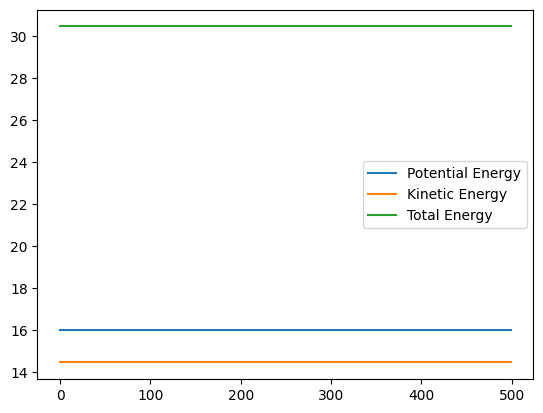

In [120]:
plt.plot(range(energies[1].size), energies[1], label="Potential Energy")
plt.plot(range(energies[0].size), energies[0], label="Kinetic Energy")
plt.plot(range(energies[0].size), energies[0]+energies[1], label="Total Energy")

plt.legend()

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from data_types import Configuration
from build_ensemble import square_build
from evolve import force, find_directions, calculate_energies, update_velocity, update_position
from config import epsilon

posarr = np.array([[0.1, 5.75], [0.1 + 2*epsilon,5.75]])
conf = Configuration(
    posarr,
    np.array([[0.1, 0.1], [-0.1, 0.1]]),
    force(posarr)
)

print(f"Directions: {find_directions(conf.positions[0], conf.positions[1])}")
print(f"Force on particle 1: {conf.forces[0]}")
print(f"Magnitude of change in position: {np.linalg.norm((new_pos:=update_position(conf))[0])-conf.positions[0]}")
new_vel = update_velocity(conf, new_pos)[0]

print(f"Delta v on particle 1: {conf.velocities[0]-new_vel[0]}")
pre_energy = calculate_energies(conf)
# post_energy = calculate_energies(Configuration(new_pos, new_vel, []))
print(f"Initial potential energy: {pre_energy[1]}")
# print(f"Kinetic energy change: {post_energy[0] - pre_energy[0]}")


Directions: (array([], dtype=float64), array([], dtype=float64))
Force on particle 1: [0 0]
Magnitude of change in position: [5.65087459e+00 8.74585665e-04]
Delta v on particle 1: [0. 0.]
Initial potential energy: 0.9384765625


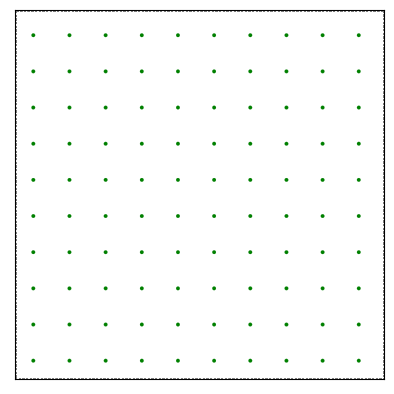

In [4]:
new = update_position(starting_conf)
plot(new)

In [70]:
import numpy as np
a = np.array([[[1,2],[1,2]],[[2,3],[2,3]],[[4,5],[4,5]]])
def tile_and_remove_self_reference(position_array, ndims: int=2):
    """
    Tile the input array of positions such that each particle has an associated copy of the position array. Then remove the diagonal elements of resulting matrix to remove the position of the particle to which the new position array belongs
    """
    tiled = np.tile(position_array, (position_array.shape[0],1,1))
    return tiled[~np.eye(tiled.shape[0],tiled.shape[1], dtype=bool)].reshape([tiled.shape[0], -1, ndims])


In [73]:
from build_ensemble import square_build
starting_conf = square_build()
position_subset = starting_conf.positions[0:4,:]
print(position_subset)
print(remove_diagonal_elems(starting_conf.positions))



[[0.5  0.5 ]
 [0.5  1.95]
 [0.5  3.4 ]
 [0.5  4.85]]
[[[0.5  1.95]
  [0.5  3.4 ]
  [0.5  4.85]
  [1.95 0.5 ]
  [1.95 1.95]
  [1.95 3.4 ]
  [1.95 4.85]
  [3.4  0.5 ]
  [3.4  1.95]
  [3.4  3.4 ]
  [3.4  4.85]
  [4.85 0.5 ]
  [4.85 1.95]
  [4.85 3.4 ]
  [4.85 4.85]]

 [[0.5  0.5 ]
  [0.5  3.4 ]
  [0.5  4.85]
  [1.95 0.5 ]
  [1.95 1.95]
  [1.95 3.4 ]
  [1.95 4.85]
  [3.4  0.5 ]
  [3.4  1.95]
  [3.4  3.4 ]
  [3.4  4.85]
  [4.85 0.5 ]
  [4.85 1.95]
  [4.85 3.4 ]
  [4.85 4.85]]

 [[0.5  0.5 ]
  [0.5  1.95]
  [0.5  4.85]
  [1.95 0.5 ]
  [1.95 1.95]
  [1.95 3.4 ]
  [1.95 4.85]
  [3.4  0.5 ]
  [3.4  1.95]
  [3.4  3.4 ]
  [3.4  4.85]
  [4.85 0.5 ]
  [4.85 1.95]
  [4.85 3.4 ]
  [4.85 4.85]]

 [[0.5  0.5 ]
  [0.5  1.95]
  [0.5  3.4 ]
  [1.95 0.5 ]
  [1.95 1.95]
  [1.95 3.4 ]
  [1.95 4.85]
  [3.4  0.5 ]
  [3.4  1.95]
  [3.4  3.4 ]
  [3.4  4.85]
  [4.85 0.5 ]
  [4.85 1.95]
  [4.85 3.4 ]
  [4.85 4.85]]

 [[0.5  0.5 ]
  [0.5  1.95]
  [0.5  3.4 ]
  [0.5  4.85]
  [1.95 1.95]
  [1.95 3.4 ]
  [1.95 4.85]
 

In [6]:
from config import L
import numpy as np
a = square_build()
for position in a[0]:
    if position[0] < L/2:
        if position[1] < L/2:
            print("Quadrant 1!")

Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!


In [7]:
centre_conf = square_build()
br_frame = (centre_conf[0] + np.array([L, -L]), centre_conf[1])

In [9]:
from numpy import linalg as LA

In [21]:
LA.norm(br_frame[0], axis=1)

array([14.15911665, 14.90002567, 15.6672679 , 16.45716073, 17.26659586,
       18.09295066, 18.93400993, 19.78789878, 20.65302597, 21.52803667,
       13.52017303, 14.29423868, 15.09230856, 15.91077099, 16.74663629,
       17.59742475, 18.46107327, 19.33585872, 20.22033571, 21.11328628,
       12.92408259, 13.73179127, 14.56072147, 15.40744838, 16.26919356,
       17.14369242, 18.02908923, 18.92385438, 19.82671955, 20.73662676,
       12.37703843, 13.21821701, 14.0774209 , 14.9515429 , 15.83811316,
       16.7351534 , 17.64106652, 18.55455292, 19.47454692, 20.40016811,
       11.88581455, 12.7594188 , 13.64753774, 14.54751327, 15.45727452,
       16.37519058, 17.29996344, 18.23054967, 19.16610249, 20.10592863,
       11.45759277, 12.36149719, 13.27626194, 14.19978827, 15.13047191,
       16.06706916, 17.00860311, 17.95429714, 18.90352691, 19.85578532,
       11.09966731, 12.03049438, 12.96862804, 13.91259031, 14.86127056,
       15.8138197 , 16.76957847, 17.72802776, 18.68875362, 19.65

In [20]:
a = np.array([1, 2, 3])
b = np.array([4,5,6])
print(a + b)
print(np.concatenate([a, b]))

[5 7 9]
[1 2 3 4 5 6]


In [50]:
from config import N
a = np.full((N, 4*N), np.nan)

# for elem in a:
a[~np.isnan(a)]
# print(type(np.nan))

array([], dtype=float64)

In [47]:
centre = square_build()
centre_positions = centre[0]
ewald_images = {
    "TL" : centre_positions + np.array([-L, L]),
    "CL" : centre_positions + np.array([-L, 0]),
    "BL" : centre_positions + np.array([-L, -L]),
    "BC" : centre_positions + np.array([0, -L]),
    "BR" : centre_positions + np.array([L, -L]),
    "CR" : centre_positions + np.array([L, 0]),
    "TR" : centre_positions + np.array([L, L]),
    "TC" : centre_positions + np.array([0, L]),
}
ewald_image = np.concatenate([centre_positions, *ewald_images.values()])



In [82]:
a = np.full((N, 9*N), np.nan)
for i in range(N):
    assert ewald_image[i, 0] > 0 and ewald_image[i, 0] < L # Check that atom is indeed in centre square
    assert ewald_image[i, 1] > 0 and ewald_image[i, 1] < L
    position = ewald_image[i]
    distances = LA.norm(ewald_image-position, axis=1)
    a[i,:] =  np.where(distances<L/2, distances, np.nan)
    directions = LA.unit


In [132]:

v = np.array([[1,2], [2,3], [4,5]], dtype=float)
v = np.divide(v, np.linalg.norm(v, axis=0)).transpose().reshape(3, 2)
# np.linalg.norm(v, axis=0)
v

array([[0.21821789, 0.43643578],
       [0.87287156, 0.32444284],
       [0.48666426, 0.81110711]])

In [181]:
# x_ = np.linalg.norm(x, axis=1).reshape([3, 1])
# x_ = np.concatenate(x_)


In [231]:
from numpy import newaxis
x = np.array([[1,2], [2,3], [4,5]], dtype=float)
y = np.array([1,2])
x-y
# x_ = np.linalg.norm(x, axis=1)
# x_ = np.concatenate([x_, x_]).reshape([3,-1], order='F')


array([[0., 0.],
       [1., 1.],
       [3., 3.]])

In [228]:
print(x)
print(x_)
x/x_

[[1. 2.]
 [2. 3.]
 [4. 5.]]
[[2.23606798 2.23606798]
 [3.60555128 3.60555128]
 [6.40312424 6.40312424]]


array([[0.4472136 , 0.89442719],
       [0.5547002 , 0.83205029],
       [0.62469505, 0.78086881]])

In [225]:
x_ = np.linalg.norm(x, axis=1)#.reshape([3,-1])
x_ = np.concatenate([x_, x_]).reshape([3,-1], order='F')
x_

array([[2.23606798, 2.23606798],
       [3.60555128, 3.60555128],
       [6.40312424, 6.40312424]])

In [230]:
len(square_build()[0])

100

In [1]:
import numpy as np

In [7]:
a = np.random.uniform(size=(100,2))

In [17]:
# a.shape
np.sum(np.linalg.norm(a, axis=1)**2)

69.59742908631645

In [23]:
from config import L, N
X,Y = np.mgrid[0.1:L-0.1:(L-0.2)/np.sqrt(N), 0.1:L-0.1:(L-0.2)/np.sqrt(N)]
initial_positions = np.array(list(zip(X.flatten(), Y.flatten())))

# initial_positions = 


array([[0.1       , 0.1       ],
       [0.1       , 1.73333333],
       [0.1       , 3.36666667],
       [0.1       , 5.        ],
       [0.1       , 6.63333333],
       [0.1       , 8.26666667],
       [1.73333333, 0.1       ],
       [1.73333333, 1.73333333],
       [1.73333333, 3.36666667],
       [1.73333333, 5.        ],
       [1.73333333, 6.63333333],
       [1.73333333, 8.26666667],
       [3.36666667, 0.1       ],
       [3.36666667, 1.73333333],
       [3.36666667, 3.36666667],
       [3.36666667, 5.        ],
       [3.36666667, 6.63333333],
       [3.36666667, 8.26666667],
       [5.        , 0.1       ],
       [5.        , 1.73333333],
       [5.        , 3.36666667],
       [5.        , 5.        ],
       [5.        , 6.63333333],
       [5.        , 8.26666667],
       [6.63333333, 0.1       ],
       [6.63333333, 1.73333333],
       [6.63333333, 3.36666667],
       [6.63333333, 5.        ],
       [6.63333333, 6.63333333],
       [6.63333333, 8.26666667],
       [8.

In [17]:
initial_positions

array([[[0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       ],
        [0.1       , 1.73333333, 3.36666667, 5.        , 6.63333333,
         8.26666667]],

       [[1.73333333, 1.73333333, 1.73333333, 1.73333333, 1.73333333,
         1.73333333],
        [0.1       , 1.73333333, 3.36666667, 5.        , 6.63333333,
         8.26666667]],

       [[3.36666667, 3.36666667, 3.36666667, 3.36666667, 3.36666667,
         3.36666667],
        [0.1       , 1.73333333, 3.36666667, 5.        , 6.63333333,
         8.26666667]],

       [[5.        , 5.        , 5.        , 5.        , 5.        ,
         5.        ],
        [0.1       , 1.73333333, 3.36666667, 5.        , 6.63333333,
         8.26666667]],

       [[6.63333333, 6.63333333, 6.63333333, 6.63333333, 6.63333333,
         6.63333333],
        [0.1       , 1.73333333, 3.36666667, 5.        , 6.63333333,
         8.26666667]],

       [[8.26666667, 8.26666667, 8.26666667, 8.26666667, 8.26666667,
         8.